<a href="https://colab.research.google.com/github/ArtisVansovics/loan_data_analysis/blob/main/loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Application Risk Assesment

## Introduction
A data set of 10 000 historical loan application samples is provided. By using the data set a classification model is built in order to predict, if a new client will default or pay back the loan.

The target variable for the model is *First Payment Delay 30 days* (**fdp30**). Value of 1 means that the client defaulted, by not being able to pay back the loan in less than 30 days from the designated loan repayment period. O means that the client was able to repay the loan in time.

## Loading the data

In [1]:
import numpy as np
import pandas as pd
import os

# Imports for Google Sheet access
from google.colab import auth
import gspread
from google.auth import default

# Imports to set up plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Loading graphics in retina format to make them more sharp and legible
%config InlineBackend.figure_format = 'retina'

# Precision of printed numerical values of the Pandas data frame
pd.set_option("display.precision", 2)

In [2]:
# Loading initial data set
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('all_data_set').sheet1
# Saving initial data set as a Pandas DataFrame
df = pd.DataFrame(worksheet.get_all_records())

## Checking the data

In [6]:
df.head()

,r_application_id,app_date,amount,original_amount,term,original_term,commission_charged,gender,dob,email,...,provider_5_device_os,provider_5_device_screen,provider_5_device_type,provider_5_rule_zero,provider_5_rule_one,provider_5_rule_two,provider_5_rule_three,credit_limit,new_income,new_liabilities
0,233991,2018-03-26 13:11:58,1000.0,1000.0,30,30,250,0,1988-10-25,test@wp.pl,...,WINDOWS NT 6.1,1024X1280,WINDOWS,,,,,1000.0,2200.0,200.0
1,234008,2018-03-26 13:26:38,1500.0,2500.0,30,30,375,0,1975-11-22,test@wp.pl,...,WINDOWS NT 10.0,768X1366,WINDOWS,,,,,1500.0,5800.0,600.0
2,234010,2018-03-26 13:27:51,300.0,1000.0,30,30,75,1,1995-04-04,test@gmail.com,...,WINDOWS NT 6.1,1080X1920,WINDOWS,,,,,300.0,2350.0,300.0
3,234155,2018-03-26 15:47:22,1500.0,2500.0,30,30,375,1,1983-12-12,test@vp.pl,...,ANDROID 6.0.1,640X360,ANDROID,,,,,1500.0,2600.0,1000.0
4,234006,2018-03-26 13:24:59,400.0,400.0,30,30,100,1,1992-03-10,test@onet.pl,...,ANDROID 7.0,640X360,ANDROID,,,,,1000.0,2100.0,300.0


In [ ]:
df.isnull().sum().max()

0

There are no null values in the data set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 84 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   r_application_id                          10000 non-null  int64  
 1   app_date                                  10000 non-null  object 
 2   amount                                    10000 non-null  float64
 3   original_amount                           10000 non-null  float64
 4   term                                      10000 non-null  int64  
 5   original_term                             10000 non-null  int64  
 6   commission_charged                        10000 non-null  int64  
 7   gender                                    10000 non-null  int64  
 8   dob                                       10000 non-null  object 
 9   email                                     10000 non-null  object 
 10  employment_status                  

There are 10 000 data entries and 84 data points.

In [ ]:
df[df["fpd30"] == 1].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


r_application_id                           233617.36
amount                                        940.86
original_amount                              1317.50
term                                           29.78
original_term                                  29.79
commission_charged                            233.65
gender                                          0.62
rejected_applications                           0.65
provider_1_count_providers                      4.05
provider_1_confirmed_accounts                   3.34
provider_1_nonconfirmed_accounts                0.71
provider_2_positive_supplier_count              1.96
provider_2_negative_count                       0.00
provider_2_positive_count                       9.02
provider_2_total_debt                           0.00
provider_3_debitors_count                       0.00
provider_3_creditors_count                      0.00
provider_3_total_arrears                        0.00
provider_3_providers_count                    

In [ ]:
df[df["fpd30"] == 0].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


r_application_id         234679.27
amount                      981.85
original_amount            1320.40
term                         29.38
original_term                29.38
commission_charged          243.14
gender                        0.54
rejected_applications         0.36
fpd30                         0.00
credit_limit               1191.13
new_income                 2563.49
dtype: float64

## Exploring the data

### Distribution of defaulted clients

In [30]:
s1 = df['fpd30'].value_counts()
s2 = s1.div(100)
df30 = pd.DataFrame(s1)
df30.columns = ['count']
df30['%'] = s2
df30 = df30.style.set_caption('fdp30 counts')
df30

,count,%
0,8206,82.06
1,1794,17.94


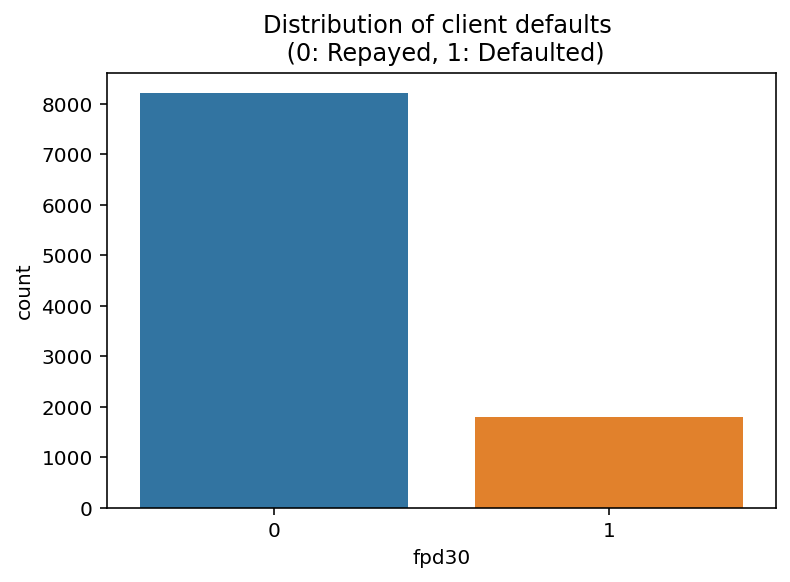

In [9]:
sns.countplot(x='fpd30', data=df)
plt.title('Distribution of client defaults \n (0: Repayed, 1: Defaulted)')
plt.show()

In total 1794 clients or 17.9% defaulted (fpd30 = 1), while 82.1% were able to pay back their loans.

### Loan amounts

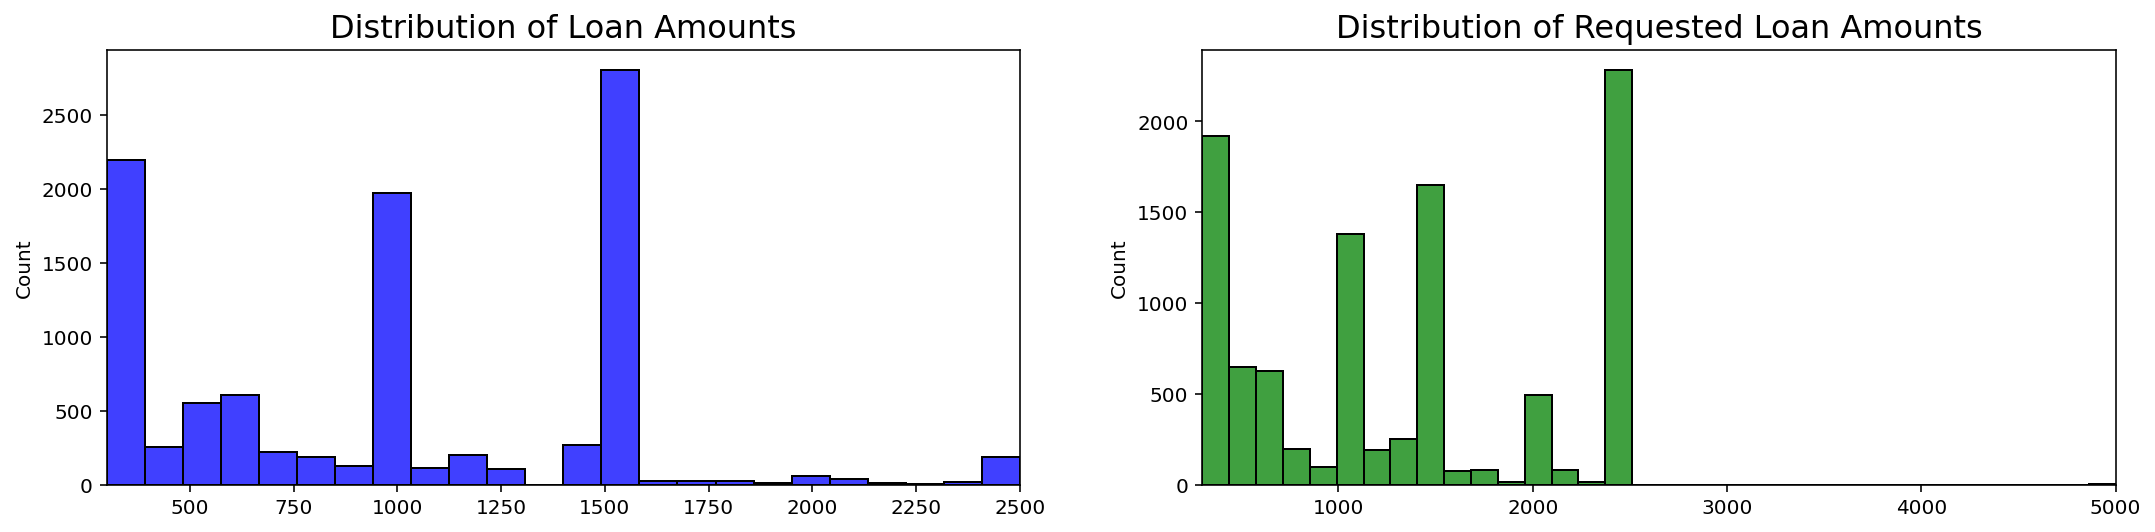

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_value = df['amount'].values
orig_amount_value = df['original_amount'].values

sns.histplot(amount_value, ax=ax[0], color='b')
ax[0].set_title('Distribution of Loan Amounts', fontsize=16)
ax[0].set_xlim([min(amount_value), max(amount_value)])

sns.histplot(orig_amount_value, ax=ax[1], color='g')
ax[1].set_title('Distribution of Requested Loan Amounts', fontsize=16)
ax[1].set_xlim([min(orig_amount_value), max(orig_amount_value)])

plt.show()

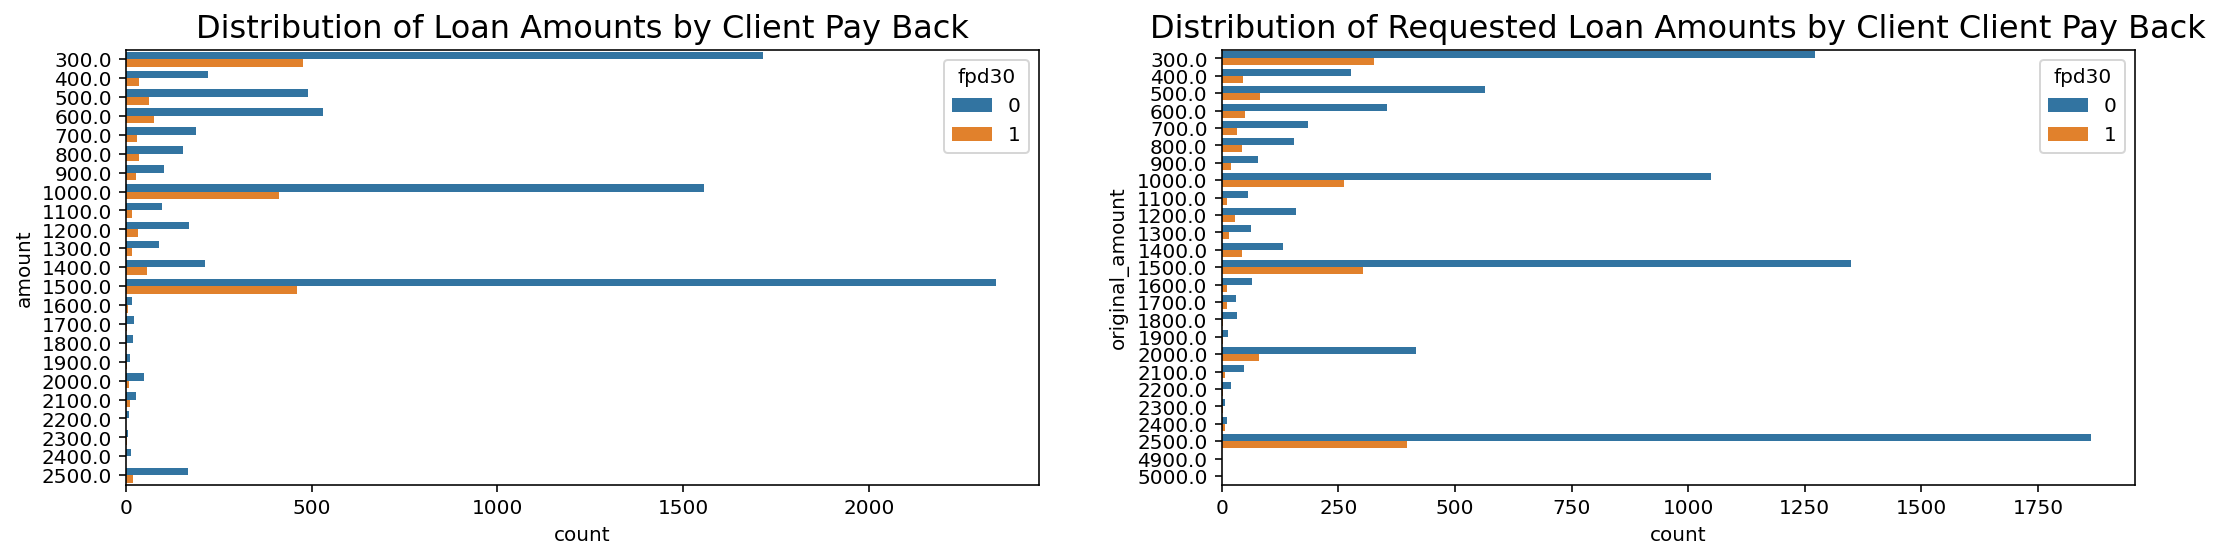

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.countplot(y="amount", hue="fpd30", data=df, ax=ax[0]);
ax[0].set_title('Distribution of Loan Amounts by Defaulted Clients', fontsize=16)

sns.countplot(y="original_amount", hue="fpd30", data=df, ax=ax[1]);
ax[1].set_title('Distribution of Requested Loan Amounts by Defaulted Clients', fontsize=16)

plt.show()

Distribution of loan amounts shows that most of the loans given are under 1600. In general, most people either received the smaller, 300 loan amount, a medium 1000 loan, or the 1500 loan, which is the most commmonly distributed loan amount. On the other hand, the most popular originally requested loan amount of 2500 has been approved to only a relatively small amount of clients as it also apears to be the largest approved amount.

## Test

In [5]:
columns = ['amount', 'original_amount']

df.groupby(df['fpd30'], as_index=False)[columns].count()

,fpd30,amount,original_amount
0,0,8206,8206
1,1,1794,1794


In [47]:
columns = ['amount', 'original_amount']

df.pivot_table(
    columns,
    ["fpd30"],
    aggfunc="mean",
)



,amount,original_amount
fpd30,,
0,981.85,1320.4
1,940.86,1317.5
